## Introduction 

Dans mon article sur [le réseau à un neurone (régression logistique)](https://thedatafrog.com/fr/regression-logistique/), nous avons construit le réseau de neurones le plus simple possible pour classer un échantillon 1D en deux catégories. Nous avons aussi vu que ce réseau à un seul neurone est équivalent à une régression logistique. Enfin, nous avons appris ce qu'est la fonction d'activation sigmoïde. 

Aujourd'hui, nous allons faire le même exercice en 2D, et vous apprendrez que: 

* la régression logistique fonctionne aussi en 2D, et en fait quelque soit le nombre de dimensions; 
* la régression logistique est un **algorithme linéaire**;
* Il est souvent nécessaire de rajouter d'utiliser un algorithme non linéaire pour décrire et échantillon de données, et donc d'aller au delà de la régression logistique. 

**Pré-requis:**

Pour pouvoir suivre ce tuto, il vous faut connaître la régression logistique à 1D, ou suivre [mon tuto à ce sujet](https://thedatafrog.com/fr/regression-logistique/).

## Exécution de ce tuto

La première possibilité est de [l'ouvrir sur la plateforme Colaboratory de google.](https://colab.research.google.com/github/cbernet/maldives/blob/master/one_neuron/logistic_regression_2d_fr.ipynb)

Si vous préférez exécuter le code sur votre machine: 

* Installez [Anaconda](https://thedatafrog.com/installer-anaconda-data-science-python/) pour python 3.X, si ce n'est pas déjà fait
* Téléchargez [le dépôt contenant ce notebook](https://github.com/cbernet/maldives/archive/master.zip)
* Décompressez le, par exemple vers `Downloads/maldives-master`
* Lancez jupyter notebook
* Depuis la page principale, naviguez vers `Downloads/maldives-master/one_neuron`
* Ouvrez `logistic_regression_2d_fr.ipynb`

Mais bien sûr, vous pouvez vous contenter de continuer votre lecture sur ce site. 

Tout d'abord, importons les packages dont nous aurons besoin:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Nous engendrerons notre échantillon nous-mêmes, 
# avec nsamples exemples dans chaque catégorie.
nexamples = 500

## Création de l'échantillon

Nous allons créer un échantillon d'exemples avec chacun deux valeurs x1 et x2, dans deux catégories. 
Pour la catégorie 0, la distribution de densité de probabilité sous-jacente est une Gaussienne en deux dimensions centrée sur (0,0), de largeur 1 suivant les deux directions. Pour la catégorie 1, la Gaussienne est centrée sur (2,2). Nous assignerons l'étiquette 0 à la catégorie 0, et l'étiquette 1 à la catégorie 1. 


In [3]:
normal = np.random.multivariate_normal
# largeur au carré: 
s2 = 1
# ci-dessous, nous donnons les coordonnées de la 
# moyenne de la Gaussienne comme premier argument, 
# et ensuite la matrice de covariance qui décrit sa largeur.
# nous engendrons nexamples exemples dans chaque catégorie.
sgx0 = normal([0.,0.], [[s2, 0.], [0.,s2]], nexamples)
sgx1 = normal([2.,2.], [[s2, 0.], [0.,s2]], nexamples)
# création des étiquettes pour chaque catégorie. 
sgy0 = np.zeros((nexamples,))
sgy1 = np.ones((nexamples,))

Voici la distribution des examples dans chaque catégorie: 

Text(0, 0.5, 'x2')

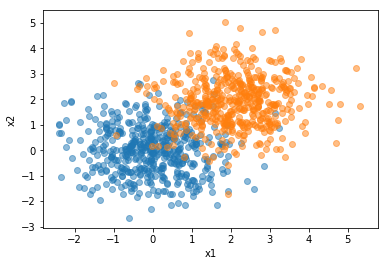

In [4]:
plt.scatter(sgx0[:,0], sgx0[:,1], alpha=0.5)
plt.scatter(sgx1[:,0], sgx1[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')

Notre but est d'entraîner une régression logistique pour classifier les points de coordonnées (x1,x2) dans l'une des deux catégories en fonction des valeures de x1 et x2. Pour réaliser l'entraînement, nous devons construire un échantillon unique contenant les exemples des deux catégories. Pour cela, nous concaténons les tableaux de points ainsi que les tableaux d'étiquettes: 

In [5]:
sgx = np.concatenate((sgx0, sgx1))
sgy = np.concatenate((sgy0, sgy1))

print(sgx.shape, sgy.shape)

(1000, 2) (1000,)


## La fonction sigmoïde à deux dimensions

La fonction sigmoïde, aussi appelée logistique, est essentielle dans les problèmes de classement binaires, comme discuté en détail [ici](https://thedatafrog.com/fr/regression-logistique/). Cette fonction est définie comme: 

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

Et voici sa forme à une dimension:

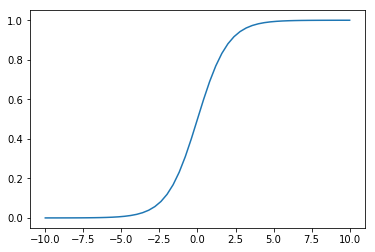

In [6]:
# définition des paramètres: 
# le biais: 
b = 0
# le poids: 
w = 1

def sigmoid(x1):
    # z is a linear function of x1
    z = w*x1 + b
    return 1 / (1+np.exp(-z))

# create an array of evenly spaced values
linx = np.linspace(-10,10,51)
plt.plot(linx, sigmoid(linx))

En 2D, l'expression de cette fonction reste la même, mais $z$ est maintenant une fonction des deux variables $x_1$ et $x_2$, 

$$z=w_1 x_1 + w_2 x_2 + b$$

Et voici le code pour la sigmoïde 2D:

In [8]:
# définition des paramètres: 
# le biais: 
b = 0
# le poids de x1
w1 = 1
# le poids de x2
w2 = 2

def sigmoid_2d(x1, x2):
    # z est une fonction linéaire de x1 et x2
    z = w1*x1 + w2*x2 + b
    return 1 / (1+np.exp(-z))

Pour voir à quoi cette fonction ressemble, nous pouvons faire un graphique 2D, avec x1 sur l'axe horizontal et x2 sur l'axe vertical. La valeur de la sigmoïde est alors représentée par une coleur pour chaque point (x1,x2). Pour faire cela, nous utiliserons une technique assez standard de matplotlib. Comme cette technique est un peu compliquée, j'aimerais l'expliquer ici en détail. 

D'abord, créons un tableau de valeurs régulièrement espacées suivant x1, et un autre suivant x2. Pris ensemble, ces tableaux nous permettrons de cartographier le plan (x1, x2). 

In [10]:
xmin, xmax, npoints = (-6,6,51)
linx1 = np.linspace(xmin,xmax,npoints)
# pas besoin d'un nouveau tableau, nous nous 
# contentons de réutiliser celui que nous avons 
# avec un nom différent: 
linx2 = linx1

Ensuite, nous créons une **meshgrid** à partir de ces deux tableaux: 

In [11]:
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
print(gridx1.shape, gridx2.shape)
print('gridx1:')
print(gridx1) 
print('gridx2')
print(gridx2)

(51, 51) (51, 51)
gridx1:
[[-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 ...
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]
 [-6.   -5.76 -5.52 ...  5.52  5.76  6.  ]]
gridx2
[[-6.   -6.   -6.   ... -6.   -6.   -6.  ]
 [-5.76 -5.76 -5.76 ... -5.76 -5.76 -5.76]
 [-5.52 -5.52 -5.52 ... -5.52 -5.52 -5.52]
 ...
 [ 5.52  5.52  5.52 ...  5.52  5.52  5.52]
 [ 5.76  5.76  5.76 ...  5.76  5.76  5.76]
 [ 6.    6.    6.   ...  6.    6.    6.  ]]


Si vous regardez la première ligne de chacun de ces deux tableaux, et que vous scannez les valeurs sur ces deux ligne, vous obtenez: `(-6,-6), (-5.76, -6), (-5.52, -6)` ... Donc nous sommes en train de scanner la coordonnée x1 pour la valeur la plus faible de x2, en bas du graphique. 

Si vous prenez la deuxième ligne dans chaque tableau, vous obtenez: `(-6, -5.76), (-5.76, -5.76), (-5.52, -5.76)` ... Vous êtes donc en train de scanner la deuxième ligne en bas du graphique, après être monté d'un cran en x2. 

Avec la grille complète, vous scanneriez la totalité du graphique. 

Maintenant, nous devons calculer la valeur de la sigmoïde pour chaque point (x1, x2) de la grille. C'est très facile grâce à la sortie de `meshgrid`: 

In [12]:
z = sigmoid_2d(gridx1, gridx2)
z.shape

(51, 51)

numpy appelle la fonction `sigmoid_2d` pour chaque paire `(x1, x2)` prise dans les tableaux `gridx1` et `gridx2`.

Enfin, nous pouvons tracer notre sigmoïde en 2D: 

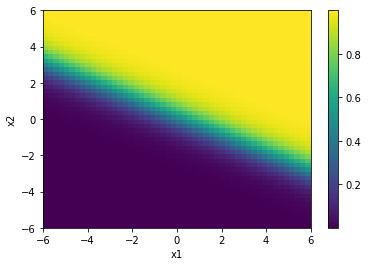

In [13]:
plt.pcolor(gridx1, gridx2, z)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

La sigmoïde 2D a le même genre de front montant que la sigmoïde 1D, mais en 2D. 
Avec les paramètres définis ci-dessus : 

* Le poids de $x_2$ est deux fois plus grand que le poids de $x_1$, et la sigmoïde évolue donc deux fois plus vite en fonction de $x_2$. Si vous mettiez l'un des poids à zero, pouvez-vous deviner ce qui se produirait? Vous pouvez tester en éditant la fonction `sigmoid_2d`, avant de ré-exécuter les cellules ci-dessus. 
* La séparation entre les deux catégories a lieu à $z=0$, c'est à dire $w_1 x_1 + w_2 x_2 + b = 0$, ou encore 

$$x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2} = -0.5 x_1$$

Ceci est l'équation d'une ligne droite. 

Vous pouvez vérifier sur le graphique ci-dessus que cette équation décrit bien la barrière de séparation. 

Si vous préférez, vous pouvez tracer la sigmoïde en 3D de cette façon : 

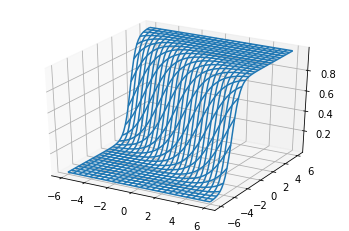

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(gridx1,gridx2,z)

## Régression logistique 

Nous allons maintenant entraîner une régression logistique pour séparer les deux classes d'exemple. Le but de cet entraînement sera d'utiliser les exemples existants pour trouver les valeurs optimales des paramètres $w_1, w_2, b$. 

Nous prendrons l'algorithme de régression logistique de scikit-learn. 
Ici, nous utilisons la méthode de minimisation LBFGS pour optimiser la valeur des paramètres. Celle-ci est similaire à la [méthode de Newton](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization), que vous connaissez peut-être. Sinon, aucun souci, je prévois un article au sujet des techniques de minimisation. 

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(sgx, sgy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

La régression logistique a été ajustée aux données, c'est à dire entraînée sur les données. Maintenant, nous pouvons l'utiliser pour prédire la probabilité qu'un point (x1,x2) appartienne à la catégorie 1. 

Nous aimerions tracer cette probabilité en 2D en fonction de x1 et x2. Pour cela, nous utiliserons la méthode `clf.predict_proba`, qui prend en entrée un tableau 2D de forme `(n_points,2)`. La première dimension indexe les points, et la deuxième contient les valeurs de x1 et x2. Encore une fois, nous utilisons notre grille pour cartographier le plan (x1,x2). Mais les tableaux `gridx1` et `gridx2` définis ci-dessus contiennent des valeurs déconnectées pour x1 et x2: 

In [16]:
print(gridx1.shape, gridx2.shape)

(51, 51) (51, 51)


Ce que nous voulons, c'est un tableau 2D de forme `(n_points, 2)`, au lieu de deux tableaux de forme (51, 51)...

Nous devons donc changer la forme de ces tableaux. D'abord, nous aplatirons ces tableaux de façon à ce que leurs valeurs apparaissent séquentiellement dans un tableau 1D, grâce à la méthode flatten. Voici ce que fait cette méthode sur un exemple simple : 

In [17]:
a = np.array([[0, 1], [2, 3]])
print(a) 
print('flat array:', a.flatten())

[[0 1]
 [2 3]]
flat array: [0 1 2 3]


Ensuite, nous regrouperons ces deux tableaux sur deux colonnes avec np.c_, qui fait cela : 

In [19]:
b = np.array([[4, 5], [6, 7]])
print(a.flatten())
print(b.flatten())
c = np.c_[a.flatten(), b.flatten()]
print(c)
print(c.shape)

[0 1 2 3]
[4 5 6 7]
[[0 4]
 [1 5]
 [2 6]
 [3 7]]
(4, 2)


Ce tableau a exactement la forme attendue par `clf.predict_proba`: une liste d'exemples avec deux valeurs. Alors allons-y, on fait pareil avec notre grille, et on calcule les probabilités pour toutes les paires (x1,x2) de la grille : 

In [20]:
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
prob = clf.predict_proba(grid)
prob.shape

(2601, 2)

C'est fait, mais `prob` n'a pas la bonne forme pour être tracé. Ci-dessous, nous allons utiliser les deux tableaux `gridx1` et `gridx2`, de forme (51,51). La forme du tableau de probabilités doit donc également être (51,51), car la méthode de tracé fait simplement la correspondance entre chaque paire (x1,x2) et une probabilité. Nous devons donc changer la forme du tableau de probabilités en (51,51). Le changement de forme se fait ainsi : 

In [21]:
d = np.array([0,1,2,3])
print(d)
print('reshaped to (2,2):')
print(d.reshape(2,2))

[0 1 2 3]
reshaped to (2,2):
[[0 1]
 [2 3]]


💡 **Toutes ces opérations de changement de forme peuvent sembler assez compliquées au départ. Mais je vous assure que l'on finit par s'y faire. Vérifiez toujours la forme de vos tableaux, et restez confiants!**

Enfin, nous pouvons faire notre graphique : 

Text(0, 0.5, 'x2')

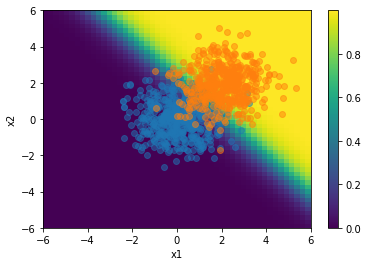

In [23]:
# notez que prob[:,1] retourne, pour tous les exemples, 
# la probabilité p d'appartenir à la catégorie 1.
# prob[:,0] retournerait la probabilité d'appartenir 
# à la catégorie 0, c'est à dire 1-p.
plt.pcolor(gridx1,gridx2,prob[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(sgx0[:,0], sgx0[:,1], alpha=0.5)
plt.scatter(sgx1[:,0], sgx1[:,1], alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')


Nous voyons que la régression logistique sépare bien les deux catégories. 

Mais qu'en serait-il de distributions plus compliquées? 

## Un problème non linéaire

Construisons maintenant un échantillon plus complexe, dans lequel :

* les exemples sont tirés au hasard suivant une distribution uniforme dans le plan (x1,x2)
* un exemple est mis dans la catégorie 0 si le produit x1*x2 est positif, et dans la catégorie 1 dans le cas contraire.

Nous tracerons la distribution de cette échantillon plus bas, pour que ce soit plus clair. 

In [24]:
x1 = np.random.uniform(-1, 1, nexamples)
x2 = np.random.uniform(-1, 1, nexamples)

In [25]:
# les valeurs de x1 et x2 sont regroupées
# dans un tableau de forme (nexamples, 2)
# ce tableau contient les exemples des 2 catégories, 
# c'est à dire tout les exemples du plan
srx = np.column_stack((x1, x2))
# selection des exemples pour la catégorie 0 
srx0 = srx[x1*x2>=0]
# et pour la catégorie 1
srx1 = srx[x1*x2<0]

Text(0, 0.5, 'x2')

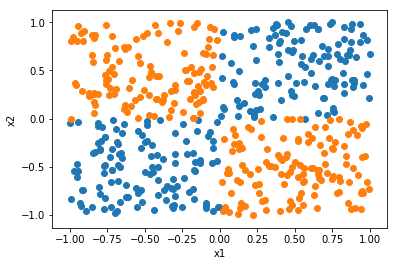

In [26]:
plt.scatter(srx0[:,0],srx0[:,1])
plt.scatter(srx1[:,0],srx1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')

Il est évident que nous ne pouvons pas tracer de ligne séparant les deux catégories avec précision. 
La régression logistique n'est donc plus du tout adaptée! 

**C'est un problème non-linéaire**. 

Pour pouvoir prendre en compte les non-linéarités, la frontière de classification doit être une fonction non linéaire des variables d'entrée x1 et x2. Cela veut dire que l'entrée pondérée $z$ du dernier neurone doit être une fonction non linéaire de x1 et x2. 

Pour cela, nous allons essayer deux approches: 

* un changement de variables, ce qui nécessite une intuition sur la densité de probabilité sous-jacente de l'échantillon
* utiliser un modèle plus complexe, comme un réseau de neurones avec au moins une couche cachée. 

## Changement de variables

Nous allons tout d'abord tenter un changement de variables. En regardant le graphique ci-dessus (et aussi le code utilisé pour engendrer les exemples!), nous voyons que la catégorisation est fonction du produit $x_1 x_2$. 

En effet, pour la première catégorie, ($x_1 > 0$ and $x_2 > 0$), or ($x_1 < 0$ and $x_2 < 0$). Donc le produit $x_1 x_2$ est toujours positif. Pour la deuxième catégorie, ce produit est toujours négatif. 

Donc, au lieu de considérer $x_1$ et $x_2$ séparément, nous travaillerons avec $u= x_1 x_2$, qui est une combinaison non linéaire de $x_1$ et $x_2$. 

Nous construisons nos exemples en fonction de $u$:

Text(0, 0.5, 'category')

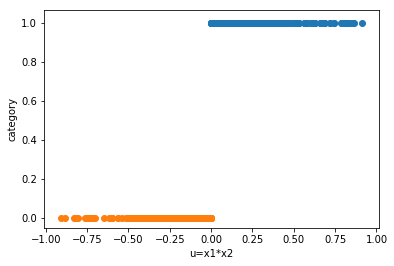

In [27]:
# catégorie 0: 
# pour tous les exemples, nous prenons le produit x1*x2 
sru0 = srx0[:,0] * srx0[:,1]
# et nous assignons l'étiquette 1 
sry0 = np.ones(len(sru0))
# catégorie 1: 
sru1 = srx1[:,0] * srx1[:,1]
sry1 = np.zeros(len(sru1))
plt.scatter(sru0, sry0)
plt.scatter(sru1, sry1)
plt.xlabel('u=x1*x2')
plt.ylabel('category')

Et nous pouvons faire une simple régression logistique à 1D, avec $u$ comme entrée:


In [28]:
# on concatène les exemples des deux catégories: 
sru = np.concatenate((sru0, sru1))
# on change la forme du tableau résultant en 
# (nexamples, 1), de façon à ce que scikit-learn
# puisse l'utiliser
sru = np.c_[sru]
# on concatène les étiquettes des deux catégories
sry = np.concatenate((sry0, sry1))
# on crée la régression logistique, et on entraîne: 
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(sru, sry)

Traçons d'abord le résultat en fonction de u. À ce stade, les operations de changement de forme doivent être assez claires pour vous, car nous les avons utilisées ci-dessus en 2D. Sinon, n'hésitez pas à rajouter des commandes dans les cellules de code ci-dessous pour imprimer la forme des différents tableaux.  

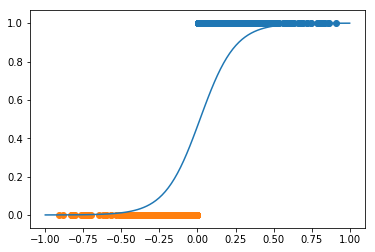

In [29]:
linx = np.c_[np.linspace(-1, 1, 100)]
prob = clf.predict_proba(linx)
prob = prob[:,1].reshape(len(linx))
plt.plot(linx, prob)
plt.scatter(sru0, sry0)
plt.scatter(sru1, sry1)

Et maintenant, traçons le résultat en fonction de $x_1$ et $x_2$ : 

In [30]:
xmin, xmax, npoints = -1, 1, 100
gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
gridu = gridx1 * gridx2
us = np.c_[gridu.flatten()]
probs = clf.predict_proba(us)
probs[:,1].shape

(10000,)

Text(0, 0.5, 'x2')

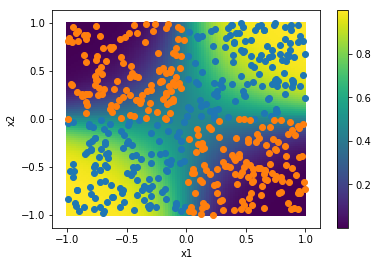

In [31]:
plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(srx0[:,0], srx0[:,1])
plt.scatter(srx1[:,0], srx1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')

Le classement fonctionne bien dans ce cas simple, mais: 

* Suivant le problème, la relation entre les deux variables peut être très compliquée, et difficile à deviner. 
* C'est encore pire à plus de deux dimensions.

Il est plus facile de complexifier notre modèle, de façon à ce qu'il puisse s'adapter aux non-linéarités par lui-même. C'est ce que nous allons faire maintenant. 

## Le réseau de neurones à couches cachée: un classificateur non linéaire

Nous allons maintenant construire un réseau de neurones simple pour classer nos exemples. 

Mais avant cela, nous devons concaténer les exemples des deux catégories en un échantillon unique : 

In [33]:
srx = np.concatenate((srx0,srx1))
sry = np.concatenate((sry0,sry1))

Le réseau de neurones sera un MLPClassifier de scikit-learn, avec une seule couche cachée contenant 50 neurones (rappelez-vous: toujours commencer petit). 

Pour ces neurones, nous utiliserons une ReLU comme fonction d'activation, car celle-ci fonctionne toujours bien pour les neurones des couches cachées. Vous pourrez essayer de la remplacer par une activation logistique (sigmoïde) plus tard si vous le souhaitez. L'apprentissage est un processus itératif, et le nombre d'itérations maximum par défaut (200) n'était pas suffisant pour atteindre la convergence. Je l'ai donc mis à 10 000.

In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50), activation='relu', max_iter=10000)

mlp.fit(srx,sry)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Pour évaluer les performances, nous devons construire un échantillon de test, comme nous l'avons fait pour l'échantillon d'entraînement : 

In [36]:
x1 = np.random.uniform(-1, 1, nexamples)
x2 = np.random.uniform(-1, 1, nexamples)
x = np.column_stack((x1, x2))
xt0 = x[x1*x2>0]
xt1 = x[x1*x2<0]
yt0 = np.ones(len(xt0))
yt1 = np.zeros(len(xt1))
xt = np.c_[np.concatenate((xt0,xt1))]
yt = np.concatenate((yt0,yt1))
print(xt.shape)

(500, 2)


Nous pouvons alors calculer la précision, qui est la probabilité de classer correctement les exemples de l'échantillon de test: 

In [37]:
from sklearn.metrics import accuracy_score
# predict the category for all test examples
predictions = mlp.predict(xt)
# compare the predictions to the true categories,
# and compute the accuracy:
accuracy_score(yt, predictions)

0.986

Les performances sont excellentes! Traçons maintenant la probabilité d'appartenir à la catégorie 1 en 2D, ainsi que l'échantillon de test : 

Text(0, 0.5, 'x2')

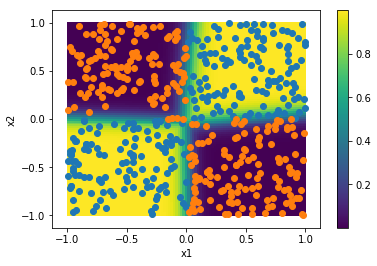

In [38]:
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
probs = mlp.predict_proba(grid)
plt.pcolor(gridx1, gridx2, probs[:,1].reshape(npoints,npoints))
plt.colorbar()
plt.scatter(xt0[:,0], xt0[:,1])
plt.scatter(xt1[:,0], xt1[:,1])
plt.xlabel('x1')
plt.ylabel('x2')


Ce réseau de neurones simple parvient très bien à décrire les non-linéarités de cet échantillon. 

Mais comment peut-il faire ça? en quoi les couches cachées sont-elles reliées à la non-linéarité? 

## Discussion

D'abord, souvenez vous que lorsqu'il n'y a pas de couche cachée, la sortie du réseau de neurones est simplement: 

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

avec 

$$z = w_1 x_1 + w_2 x_2 + b$$

Donc la barrière de séparation, qui est le lieu où $\sigma(z)=0.5$, se produit pour $z=0$, ou encore pour 

$$w_1 x_1 + w_2 x_2 + b = 0$$

C'est une équation linéaire décrivant une droite dans le plan $(x_1,x_2)$. Pour introduire des non linéarités, nous devons faire en sorte que $z$ soit une fonction non linéaire de $x_1$ et $x_2$.

C'est ce que nous avons tout d'abord fait en changeant de variables pour utiliser 

$$z= wu + b = w x_1 x_2 + b$$

Dans un réseau de neurones à couche cachée, $z$ est une fonction des sorties des neurones de la couche cachée. 
Ici, nous avons utilisé comme fonction d'activation pour ces neurones une ReLU qui ressemble à ça à une dimension:

Text(0, 0.5, 'ReLU(x)')

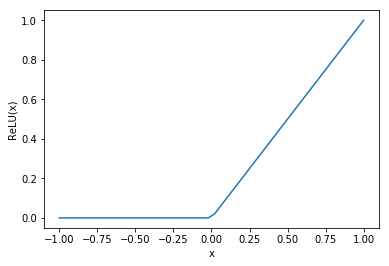

In [39]:
x = np.linspace(-1,1)
# x*(x>0) is equal to x for x>0
# and to 0 otherwise
plt.plot(x, x*(x>0))
plt.xlabel('x')
plt.ylabel('ReLU(x)')

À deux dimensions, la ReLU aurait l'air d'un plan montant démarrant sur une certaine ligne dans le plan $(x_1,x_2)$. La non-linéarité vient de la discontinuité à $x=0$. La sortie des neurones ReLU est donc une fonction non-linéaire de $x_1$ et $x_2$, et toute fonction de ces sorties sera également une fonction non linéaire de $x_1$ et $x_2$.

💡**Pour rendre un réseau de neurones non linéaire, il suffit d'y mettre au moins une couche cachée avec une fonction d'activation non linéaire, telle qu'une ReLU ou une sigmoïde. 

Maintenant, [concluons!](https://thedatafrog.com/regression-logistique-reseau-neurones#wrapup)